C:\Users\khak1\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\khak1\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\khak1\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


     age  recovery_days
0     50             13
1     30             32
2     50             20
3     20             16
4     20             24
...   ..            ...
3997  10             16
3998  20             30
3999  20             18
4001  20             32
4002  10             12

[1499 rows x 2 columns]


C:\Users\khak1\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


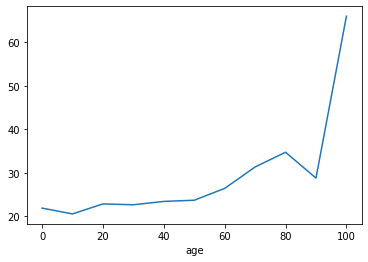

In [289]:
import pandas as pd
import datetime as dt

info = pd.read_csv('PatientInfo.csv')
route = pd.read_csv('PatientRoute.csv')
search = pd.read_csv('SearchTrend.csv')

info_dropna=info.dropna(subset=['age','confirmed_date','released_date'])

confirmed_list = []
released_list = []

confirmed_date=[]
released_date=[]

recovery_days=[]

for i in range(len(info_dropna['age'])):
    info_dropna['age'].iloc[i]=info_dropna['age'].iloc[i].replace('s','')
    info_dropna['age'].iloc[i]=int(info_dropna['age'].iloc[i])
    

for i in info_dropna['confirmed_date']:
    confirmed_list.append(i.split('-'))

for i in info_dropna['released_date']:
    released_list.append(i.split('-'))
    
for i in confirmed_list:
    confirmed_date.append(dt.datetime(int(i[0]),int(i[1]),int(i[2])))
    
for i in released_list:
    released_date.append(dt.datetime(int(i[0]),int(i[1]),int(i[2])))
    
for i,j in zip(confirmed_date,released_date):
    recovery_days.append((j-i).days)
    
info_dropna['recovery_days']=recovery_days

recovery_days_by_age=info_dropna.groupby('age')['recovery_days'].mean()

print(info_dropna[['age','recovery_days']])
recovery_days_by_age.plot()

In [286]:
info_dropna

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,recovery_days
0,1000000001,2.0,male,1964,50,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released,13
1,1000000002,5.0,male,1987,30,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released,32
2,1000000003,6.0,male,1964,50,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released,20
3,1000000004,7.0,male,1991,20,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released,16
4,1000000005,9.0,female,1992,20,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3997,7000000008,9457.0,female,NaN,10,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,25,NaN,2020-03-27,2020-04-12,NaN,released,16
3998,7000000009,9651.0,female,NaN,20,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,14,NaN,2020-03-29,2020-04-28,NaN,released,30
3999,7000000010,NaN,female,NaN,20,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,18,NaN,2020-04-03,2020-04-21,NaN,released,18
4001,7000000012,NaN,female,NaN,20,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,9,NaN,2020-04-03,2020-05-05,NaN,released,32


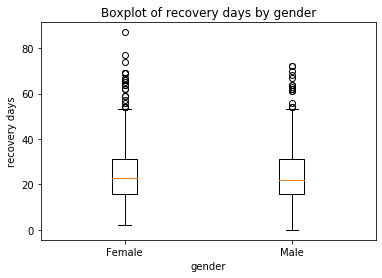

In [251]:
boxplot=plt.figure()
axes=boxplot.add_subplot(1,1,1)
axes.boxplot([info_dropna[info_dropna['sex']=='female']['recovery_days'],
        info_dropna[info_dropna['sex']=='male']['recovery_days']],
        labels=['Female','Male'])

axes.set_xlabel('gender')
axes.set_ylabel('recovery days')
axes.set_title('Boxplot of recovery days by gender')
plt.show()

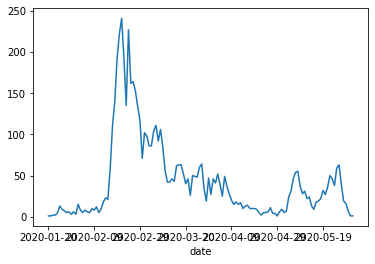

In [316]:
route_num=route.groupby('date')['latitude'].nunique()

route_num.plot()

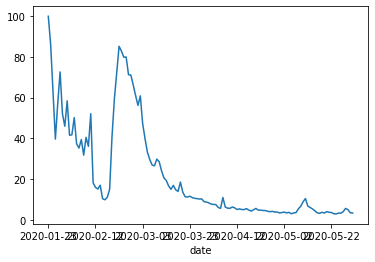

In [284]:
search_tmp=search[1483:]
search_num=search_tmp.groupby('date')['coronavirus'].mean()

search_num.plot()

In [290]:
route

,patient_id,global_num,date,province,city,type,latitude,longitude
0,1000000001,2.0,2020-01-22,Gyeonggi-do,Gimpo-si,airport,37.615246,126.715632
1,1000000001,2.0,2020-01-24,Seoul,Jung-gu,hospital,37.567241,127.005659
2,1000000002,5.0,2020-01-25,Seoul,Seongbuk-gu,etc,37.592560,127.017048
3,1000000002,5.0,2020-01-26,Seoul,Seongbuk-gu,store,37.591810,127.016822
4,1000000002,5.0,2020-01-26,Seoul,Seongdong-gu,public_transportation,37.563992,127.029534
...,...,...,...,...,...,...,...,...
8087,6100000090,NaN,2020-03-24,Seoul,Gangseo-gu,airport,37.558654,126.794474
8088,6100000090,NaN,2020-03-24,Busan,Gangseo-gu,airport,35.173220,128.946459
8089,6100000090,NaN,2020-03-25,Gyeongsangnam-do,Yangsan-si,store,35.336944,129.026389
8090,6100000090,NaN,2020-03-25,Gyeongsangnam-do,Yangsan-si,hospital,35.335757,129.025003


In [297]:
df

,patient_id,global_num_x,sex,birth_year,age,country,province_x,city_x,disease,infection_case,...,deceased_date,state,recovery_days,global_num_y,date,province_y,city_y,type,latitude,longitude
0,1000000001,2.0,male,1964,50,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,...,NaN,released,13,2.0,2020-01-22,Gyeonggi-do,Gimpo-si,airport,37.615246,126.715632
1,1000000001,2.0,male,1964,50,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,...,NaN,released,13,2.0,2020-01-24,Seoul,Jung-gu,hospital,37.567241,127.005659
2,1000000002,5.0,male,1987,30,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,NaN,released,32,5.0,2020-01-25,Seoul,Seongbuk-gu,etc,37.592560,127.017048
3,1000000002,5.0,male,1987,30,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,NaN,released,32,5.0,2020-01-26,Seoul,Seongbuk-gu,store,37.591810,127.016822
4,1000000002,5.0,male,1987,30,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,NaN,released,32,5.0,2020-01-26,Seoul,Seongdong-gu,public_transportation,37.563992,127.029534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3585,7000000008,9457.0,female,NaN,10,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,...,NaN,released,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3586,7000000009,9651.0,female,NaN,20,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,...,NaN,released,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3587,7000000010,NaN,female,NaN,20,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,...,NaN,released,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3588,7000000012,NaN,female,NaN,20,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,...,NaN,released,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN


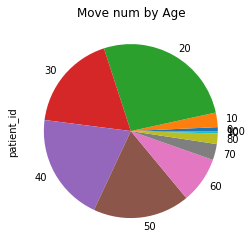

In [365]:
df = pd.merge(info_dropna, route, on='patient_id', how='left')
move_num=df.groupby('age')['patient_id'].count()

move_num.plot(kind='pie', title="Move num by Age")


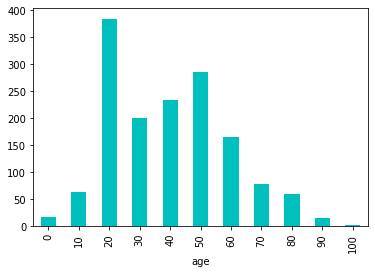

In [366]:
age = info_dropna.groupby('age')['patient_id'].count()
age.plot(kind='bar', color='c')